# Módulo 6 tarefa 1

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esses arquivos.

In [201]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [202]:
sinasc_RO_2019=pd.read_csv('b1abb33c4f.csv')

sinasc_RO_2019.head()


,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [3]:
sinasc_RO_2019.shape

(27028, 69)

In [4]:
sinasc_RO_2019.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

####  2) Monte um gráficos de barras com as variáveis APGAR1, APGAR5, SEXO, GESTACAO, ESTCIVMAE.

<AxesSubplot:xlabel='APGAR1', ylabel='count'>

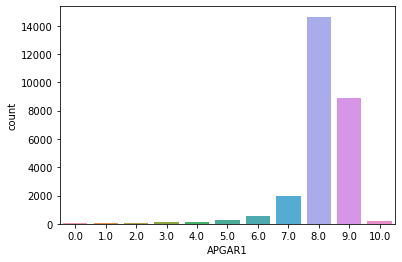

In [5]:
sns.countplot(x = 'APGAR1', data = sinasc_RO_2019)


<AxesSubplot:xlabel='APGAR5', ylabel='count'>

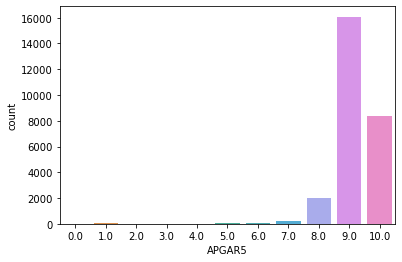

In [6]:
sns.countplot(x = 'APGAR5', data = sinasc_RO_2019)

<AxesSubplot:xlabel='SEXO', ylabel='count'>

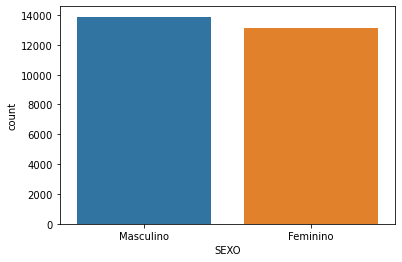

In [7]:
sns.countplot(x = 'SEXO', data = sinasc_RO_2019)

<AxesSubplot:>

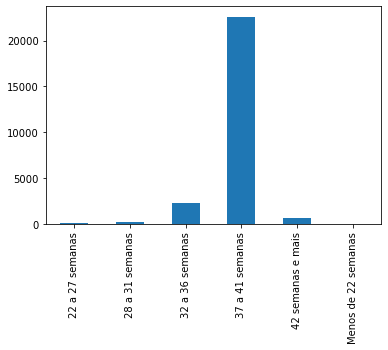

In [8]:
sinasc_RO_2019['GESTACAO'].value_counts().sort_index().plot.bar()

<AxesSubplot:xlabel='ESTCIVMAE', ylabel='count'>

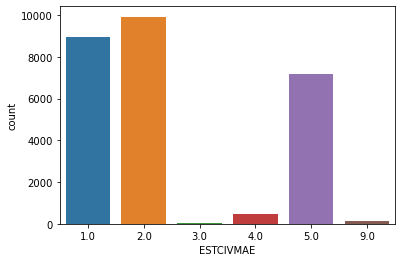

In [9]:
sns.countplot(x = 'ESTCIVMAE', data = sinasc_RO_2019)

#### 3) Monte um gráfico de barras mostrando o APGAR5 médio por CONSULTAS

In [172]:
df= sinasc_RO_2019[['APGAR5', 'CONSULTAS']]

df_1 = pd.DataFrame(df.loc [df['CONSULTAS']==1].value_counts()/2)
df_1.columns=['Nenhuma_Consulta']
df_2 = pd.DataFrame(df.loc [df['CONSULTAS']==2].value_counts()/2)
df_2.columns=['Consulta_de_1_a_3']
df_3 = pd.DataFrame(df.loc [df['CONSULTAS']==3].value_counts()/2)
df_3.columns=['Consulta_de_4_a_6']
df_4 = pd.DataFrame(df.loc [df['CONSULTAS']==4].value_counts()/2)
df_4.columns=['Consulta_de_7_e_mais']


In [173]:
df_a = df_1.merge(df_2, on='APGAR5', how='left')
df_b = df_a.merge(df_3, on='APGAR5', how='left')
df_c = df_b.merge(df_4, on='APGAR5', how='left')
df_t=df_c.T
df_t1=df_t[[0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0]]
df_final=df_t1.T
df_final

,Nenhuma_Consulta,Consulta_de_1_a_3,Consulta_de_4_a_6,Consulta_de_7_e_mais
APGAR5,,,,
0.0,0.5,3.0,3.5,1.0
1.0,1.0,0.5,2.0,8.5
2.0,2.5,1.0,3.0,2.5
3.0,1.5,1.5,3.0,1.5
4.0,0.5,1.5,6.0,3.5
5.0,1.5,2.5,5.0,13.5
6.0,2.5,4.0,11.0,22.0
7.0,5.0,10.0,28.0,77.5
8.0,55.0,63.5,235.0,639.5


<AxesSubplot:xlabel='APGAR5'>

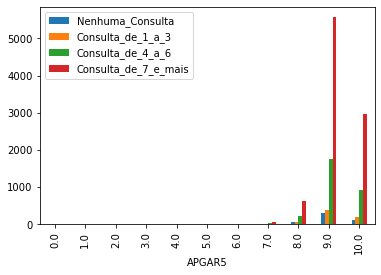

In [185]:
df_final.plot.bar()

####  4) Monte um painel com 4 gráficos mostrando as frequencias de SEXO, GESTACAO, ESTCIVMAE e CONSULTAS

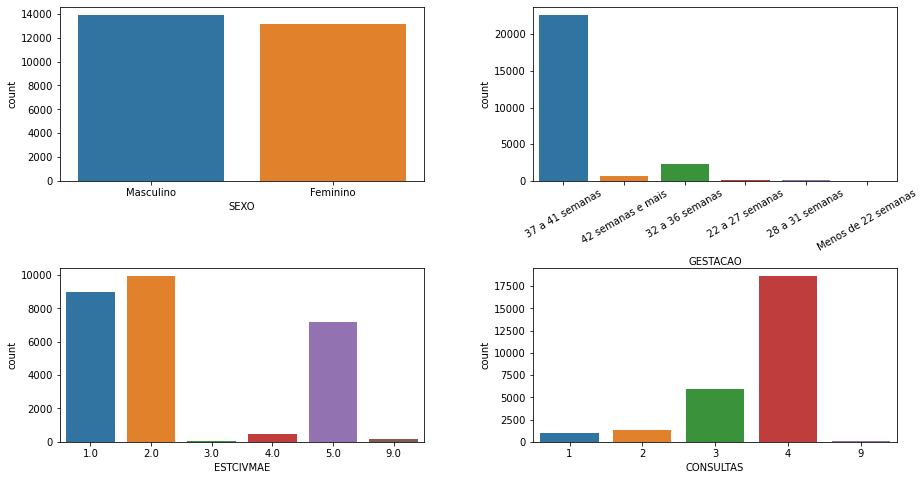

In [200]:
plt.rc('figure', figsize=(15, 8))
fig, axes = plt.subplots(2, 2)

sns.countplot(ax = axes[0, 0], x='SEXO', data=sinasc_RO_2019)
sns.countplot(ax = axes[0, 1], x='GESTACAO', data=sinasc_RO_2019)
sns.countplot(ax = axes[1, 0], x='ESTCIVMAE', data=sinasc_RO_2019)
sns.countplot(ax = axes[1, 1], x='CONSULTAS', data=sinasc_RO_2019)

plt.subplots_adjust(wspace=0.3, hspace=0.5)

axes[0,1].tick_params(axis="x", rotation = 30)
